In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cardiovascular-diseases-risk-prediction-dataset/CVD_cleaned.csv


In [2]:
import pandas as pd
df=pd.read_csv('/kaggle/input/cardiovascular-diseases-risk-prediction-dataset/CVD_cleaned.csv')

In [3]:
df.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0


In [4]:
df.shape

(308854, 19)

- 308854 rows and 19 columns are there in the dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308854 entries, 0 to 308853
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   General_Health                308854 non-null  object 
 1   Checkup                       308854 non-null  object 
 2   Exercise                      308854 non-null  object 
 3   Heart_Disease                 308854 non-null  object 
 4   Skin_Cancer                   308854 non-null  object 
 5   Other_Cancer                  308854 non-null  object 
 6   Depression                    308854 non-null  object 
 7   Diabetes                      308854 non-null  object 
 8   Arthritis                     308854 non-null  object 
 9   Sex                           308854 non-null  object 
 10  Age_Category                  308854 non-null  object 
 11  Height_(cm)                   308854 non-null  float64
 12  Weight_(kg)                   308854 non-nul

- 19 columns are there
- null values are not present in any column

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Univariate Analysis

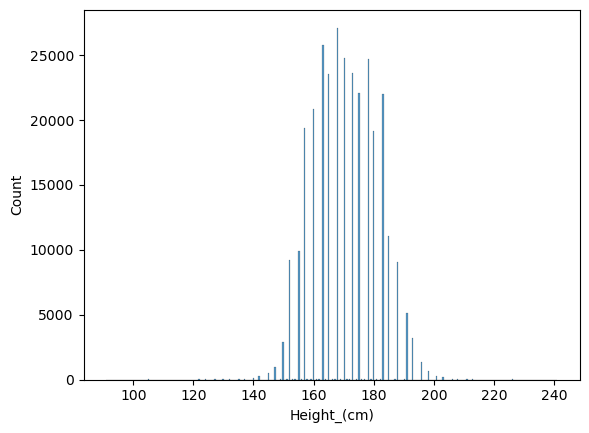

In [7]:
sns.histplot(df['Height_(cm)'])
plt.show()

1) More than 25,000 people have height of around 168 cm.
2) Around 25,000 people have height of 162 cm.
3) Less than 5000 people have heights between 120-140 cm and 200-225 cm.
4) Less than 10,000 people have heights less than 160 cm and greater than 190 cm.

<Axes: >

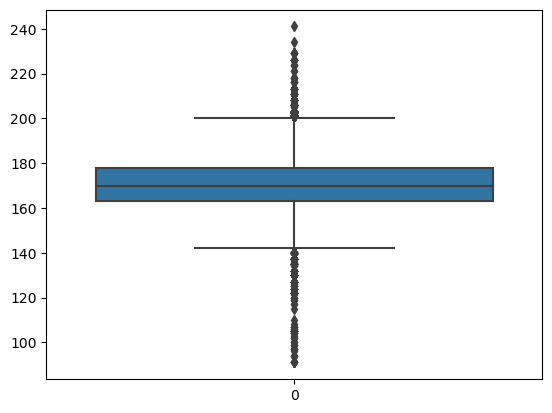

In [8]:
sns.boxplot(df['Height_(cm)'])

1) Median is at 170 2)lower quartile at around 140 3) upper quartile at around 200 4) not skewed 5) maximum height is 240 cm 6) minimum height is less than 100 cm. 


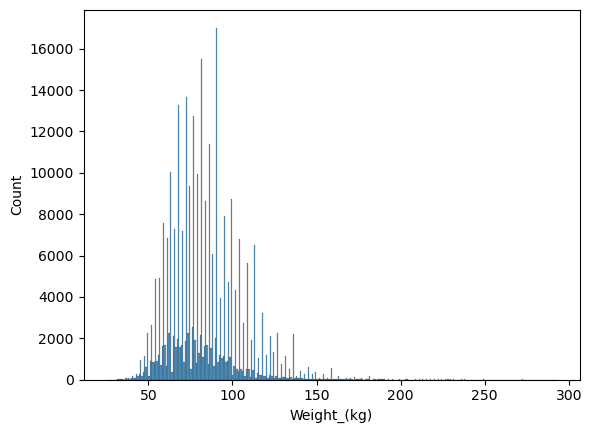

In [9]:
sns.histplot(df['Weight_(kg)'])
plt.show()

1) more than 16000 people have weight less than 100 kg.
2) less than 1000 people have weight more than 140 kg
3) more than 12000 people have weight between 70-100 kg
4) More than 2000 people have weights between 50-100 kg

<Axes: >

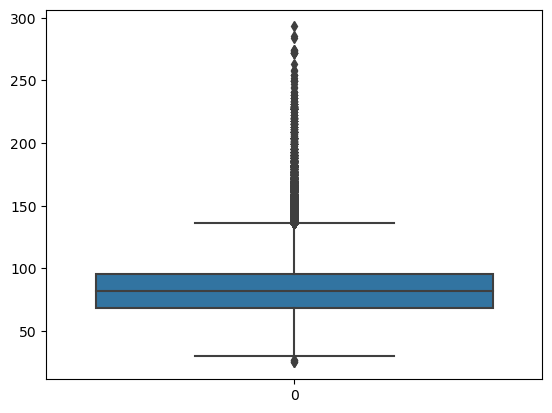

In [10]:
sns.boxplot(df['Weight_(kg)'])

1) lowest weight is less than 50 kg 2) maximum weight is 300 kg 3) median is 75 kg 4) lowest percentile is around 60 kg 5) upper quartile is around 90 kg 6) many outliers exist

<Axes: xlabel='BMI', ylabel='Count'>

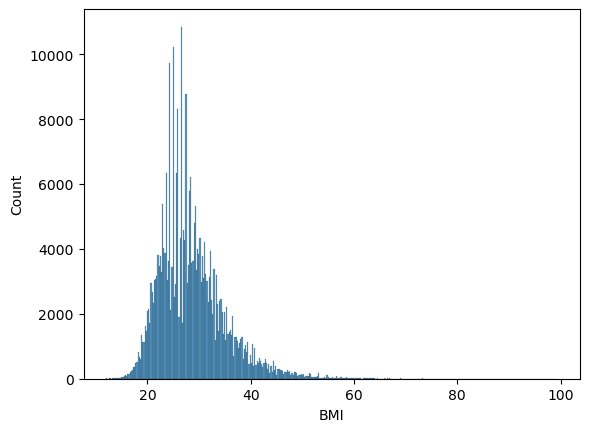

In [11]:
sns.histplot(df['BMI'])

1) left skewed 2) more than 10,000 people have BMI>30 3) less than 1000 people have BMI less than 20 and greater 50

<Axes: >

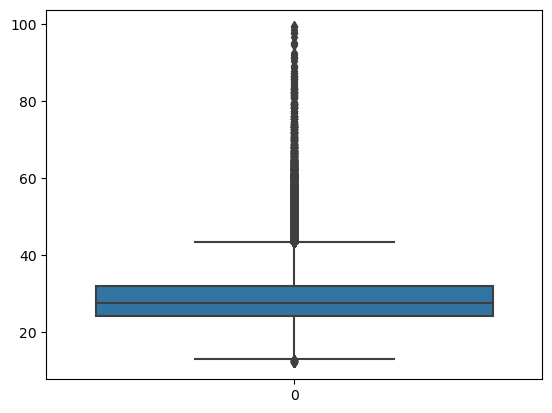

In [12]:
sns.boxplot(df['BMI'])

 1) many outliers 2) maximum BMI is 100 3) median BMI is around 28 4) lowest quartile is around 22 5) highest quartile is around 32

<Axes: xlabel='Alcohol_Consumption', ylabel='Count'>

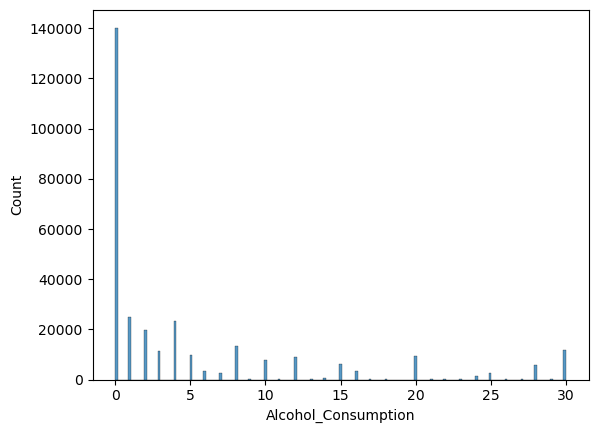

In [13]:
sns.histplot(df['Alcohol_Consumption'])

1) 14,000 people have 0 alcohol consumption 2) around 1000 people have alcohol cnsumption of 30 3) almost 0 peple have alcohol consumption of 9,11,13,14,21,22,23,26,27,29

<Axes: >

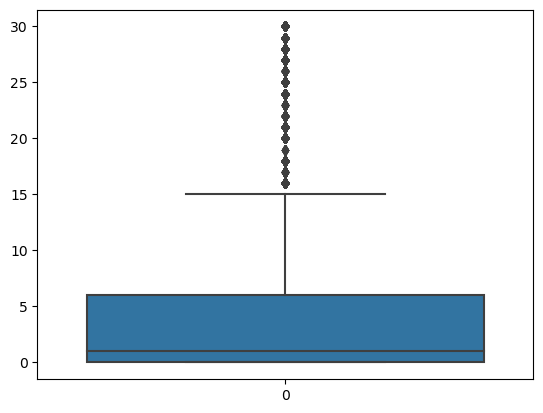

In [14]:
sns.boxplot(df['Alcohol_Consumption'])

1) left skewed 2)  25% of population drinks 0 alcohol 3) median of the populatin drinks 2 alcohol 4) 75% of the population consumes around 5 ml alcohol 5) maximum alchol consumption is 30 ml

<Axes: xlabel='Fruit_Consumption', ylabel='Count'>

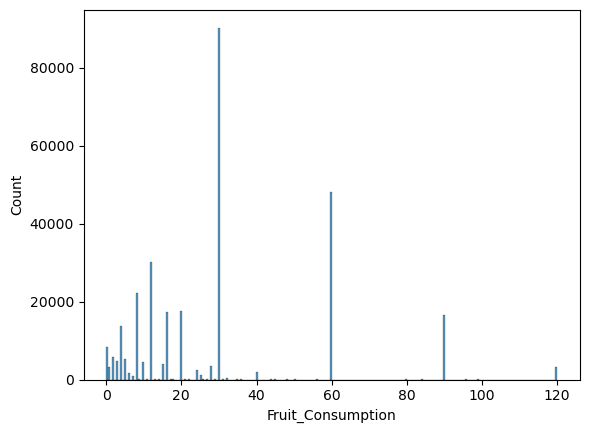

In [15]:
sns.histplot(df['Fruit_Consumption'])

1) more than 8000 people consume around 30 fruits 2) around 5000 people consume 60 fruits 3) around 3000 people consume 10 fruits 4) 0 people consume 61-90,91-120 fruits

<Axes: >

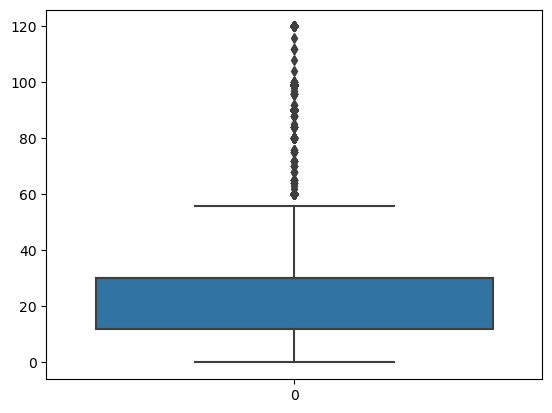

In [16]:
sns.boxplot(df['Fruit_Consumption'])

1) left skewed 2) 25% of population= 18 fruits 3) 75% of population = 30 fruits 4) maximum people consume 120 fruits

<Axes: xlabel='Green_Vegetables_Consumption', ylabel='Count'>

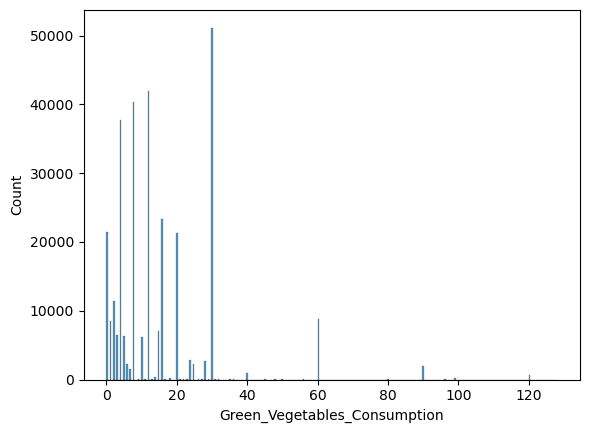

In [17]:
sns.histplot(df['Green_Vegetables_Consumption'])

<Axes: >

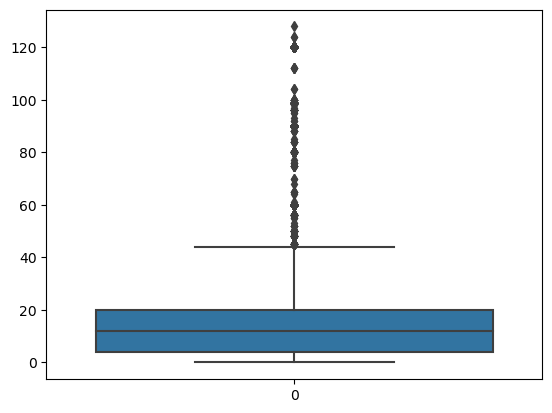

In [18]:
sns.boxplot(df['Green_Vegetables_Consumption'])

1) left skewed 2) 5000 people have 30 green vegetable consumption 4) 2000 people have 0 green vegetable consumption 5) maximum green vegetable consumption is greater than 120 6) median = 10 veg consumption 7) 25%=8 green veg consumption 8) 75% = 20 green veg consumption

<Axes: xlabel='FriedPotato_Consumption', ylabel='Count'>

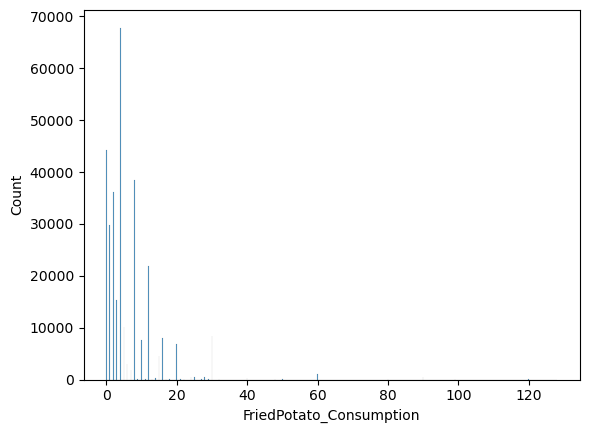

In [19]:
sns.histplot(df['FriedPotato_Consumption'])

<Axes: >

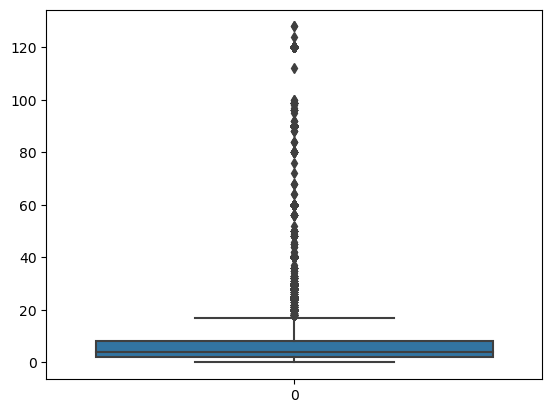

In [20]:
sns.boxplot(df['FriedPotato_Consumption'])

1) left skewed 2) more maximum fried potato consumption > 120 3) lower quartile =0 4) upper quartile = 10 5) median is 8 6)4500 peple have 0 consumption 7)nearly 0 people have more than 20 potato consumption

<Axes: xlabel='Age_Category', ylabel='Count'>

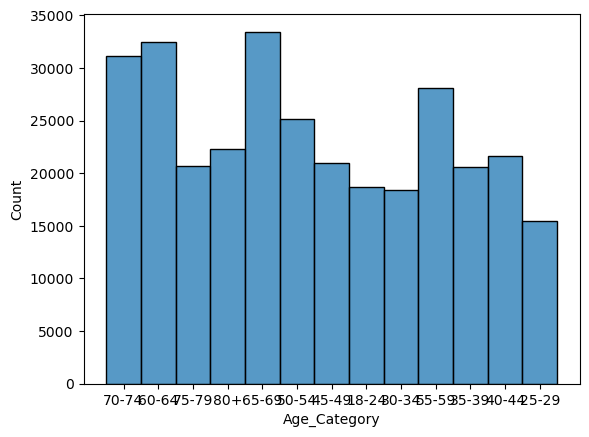

In [21]:
sns.histplot(df['Age_Category'])

1) 34000 peple have age category 65-69 2) around 30,000 people have ages 70-74 and 60-64 5) 

<Axes: xlabel='General_Health', ylabel='count'>

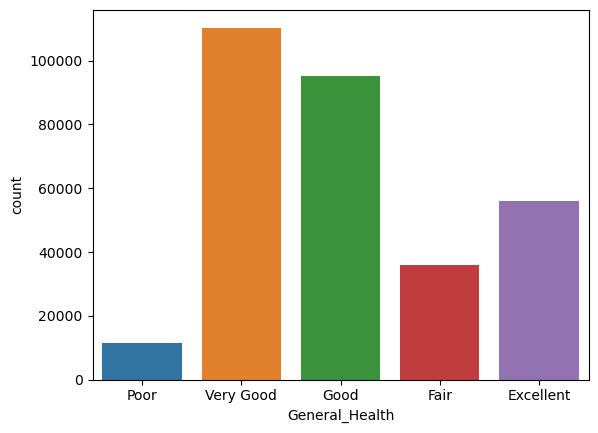

In [22]:
sns.countplot(data=df,x=df['General_Health'])

1) maximum people have very good health 2) less than 20,000 people have por health 3) around 10,000 people have good health 4) less than 40000 people have fair health 5) around 60000 people have excellent health

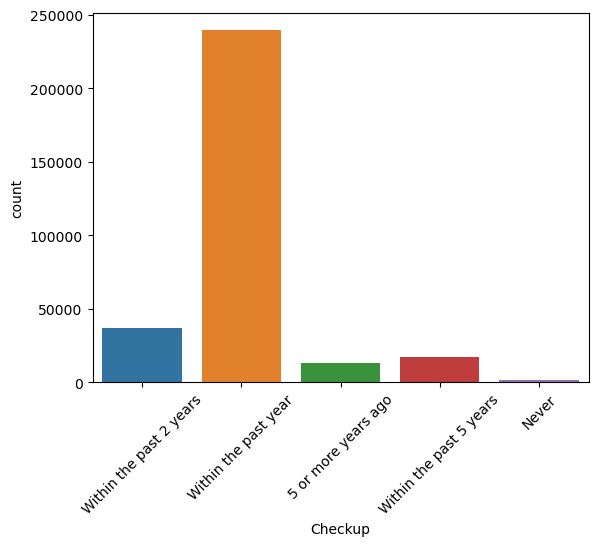

In [23]:
sns.countplot(data=df,x=df['Checkup'])
plt.xticks(rotation=45)
plt.show()

<Axes: xlabel='Exercise', ylabel='count'>

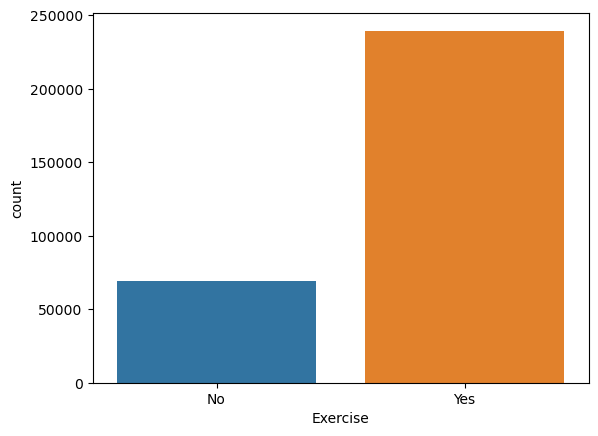

In [24]:
sns.countplot(data=df,x=df['Exercise'])

<Axes: xlabel='Heart_Disease', ylabel='count'>

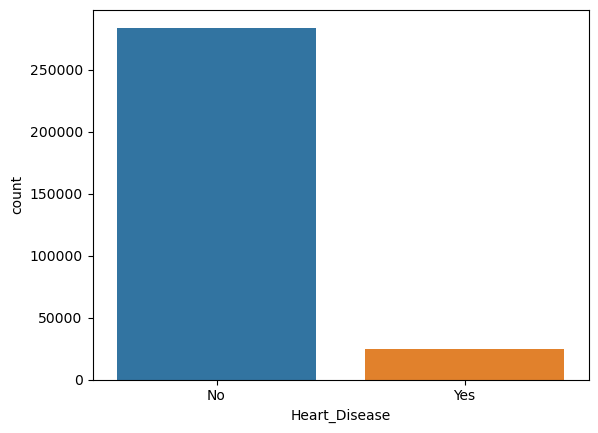

In [25]:
sns.countplot(data=df,x=df['Heart_Disease'])

<Axes: xlabel='Skin_Cancer', ylabel='count'>

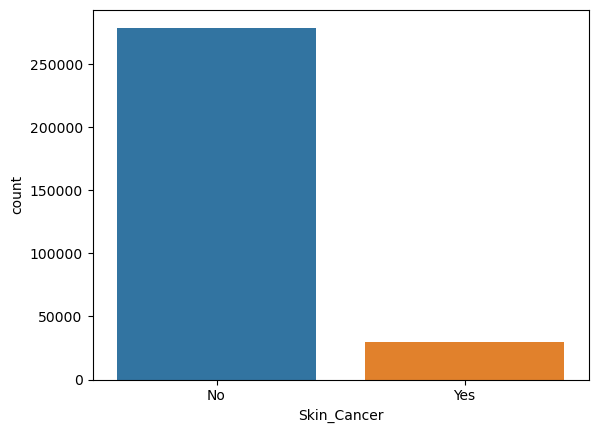

In [26]:
sns.countplot(data=df,x=df['Skin_Cancer'])

<Axes: xlabel='Other_Cancer', ylabel='count'>

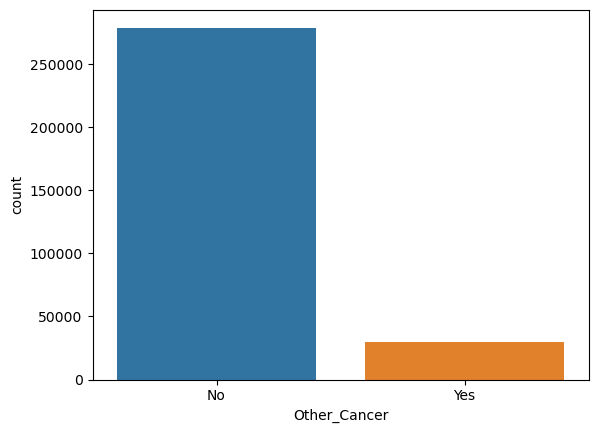

In [27]:
sns.countplot(data=df,x=df['Other_Cancer'])

<Axes: xlabel='Depression', ylabel='count'>

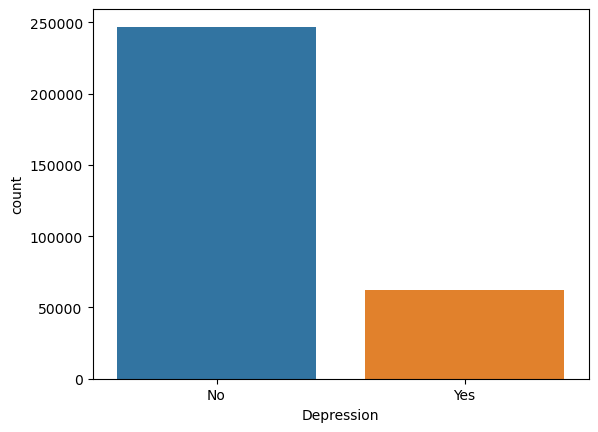

In [28]:
sns.countplot(data=df,x=df['Depression'])

<Axes: xlabel='Arthritis', ylabel='count'>

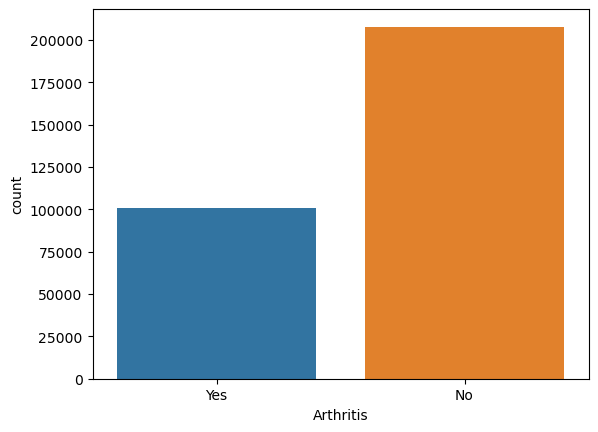

In [29]:
sns.countplot(data=df,x=df['Arthritis'])

<Axes: xlabel='Sex', ylabel='count'>

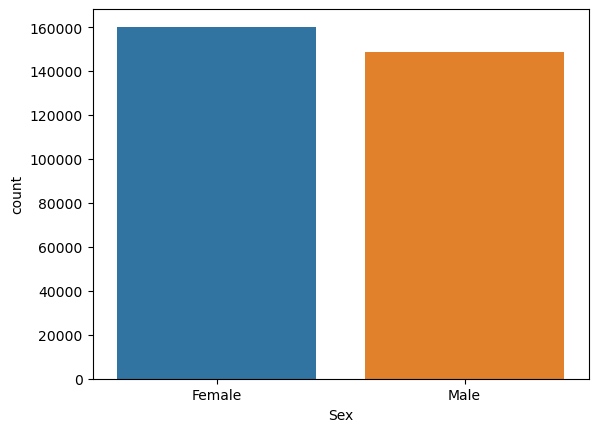

In [30]:
sns.countplot(data=df,x=df['Sex'])

<Axes: xlabel='Smoking_History', ylabel='count'>

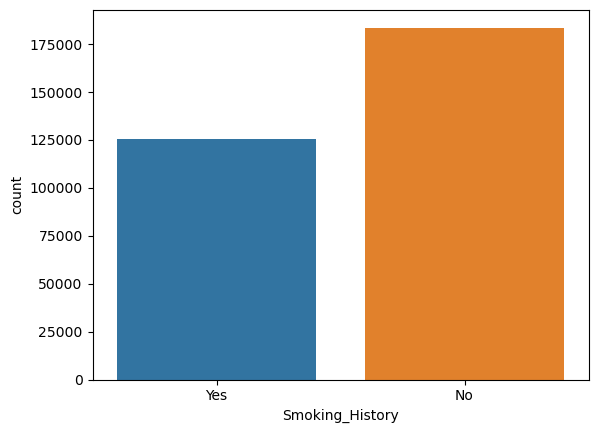

In [31]:
sns.countplot(data=df,x=df['Smoking_History'])

1) around 175,000 have no smking history and 125000 people have somoking history

# Bivariate Analysis

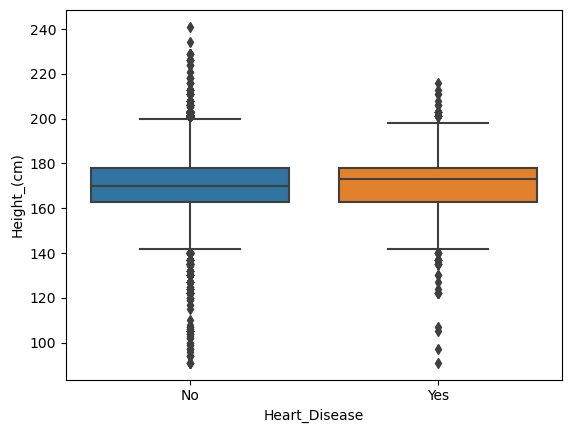

In [32]:
sns.boxplot(data=df,x='Heart_Disease',y='Height_(cm)')
plt.show()

- Data is right skewed for people having heart disease.
- Minimum height is nearly same for both groups, but people without heart disease have greater maximum height than people having heart disease
- 25 % and 75% of population for both groups have same height, but 50% of population without heart disease has less height than the other 50% of the ppulation having heart disease.

<Axes: xlabel='Heart_Disease', ylabel='Weight_(kg)'>

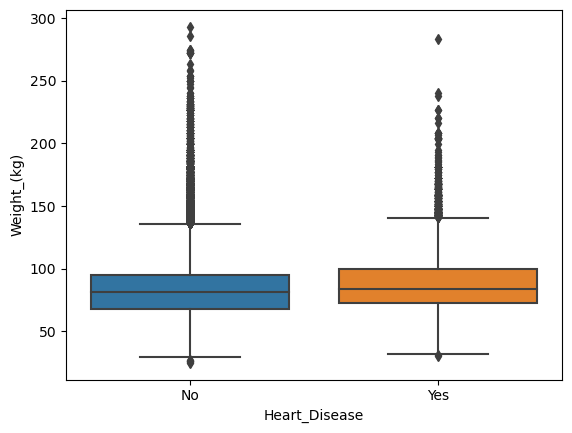

In [33]:
sns.boxplot(data=df,x='Heart_Disease',y='Weight_(kg)')

- Left skewed for people having heart disease
- a slight difference between heights of 25% and 75% of both the populations,people having heart disease are taller than people not having heart disease
- Maximum height for the group not having heart disease (300) is greater than maximum height for people having heart disease.

<Axes: xlabel='Heart_Disease', ylabel='BMI'>

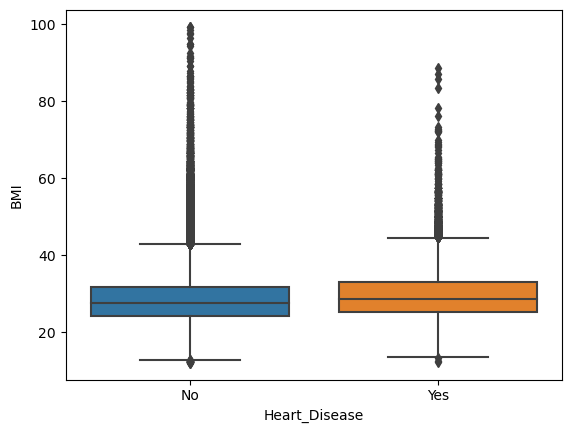

In [34]:
sns.boxplot(data=df,x='Heart_Disease',y='BMI')

- a slight difference between BMI of 25% and 75% of both the populations,people having more BMI than people not having heart disease.
- Maximum BMI for the group not having heart disease (100) is greater than maximum BMI for people having heart disease.

<Axes: xlabel='General_Health', ylabel='count'>

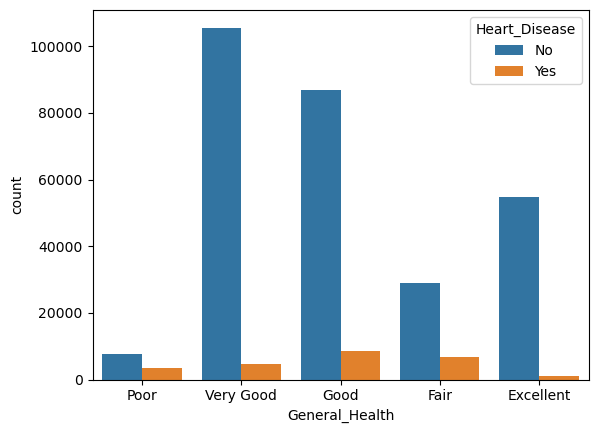

In [35]:
sns.countplot(data=df,x='General_Health',hue='Heart_Disease')

- Around 0 people who have excellent health have heart disease.
- More than 10,000 people who have very good health don't have heart diseases.

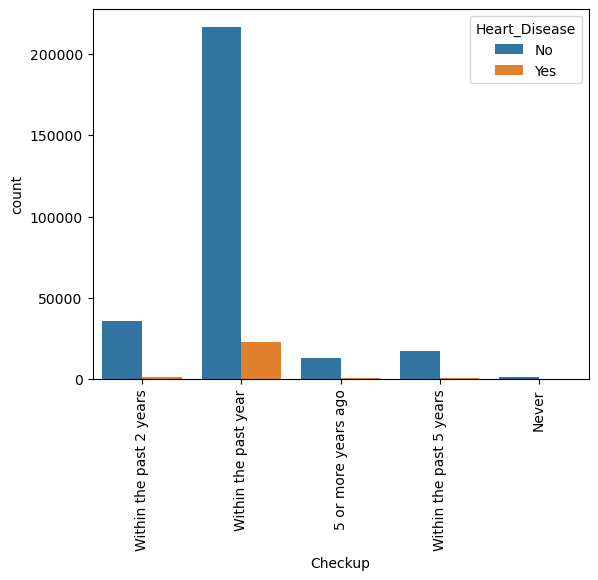

In [36]:
sns.countplot(data=df,hue='Heart_Disease',x='Checkup')
plt.xticks(rotation=90)
plt.show()

- More than 20,000 people who had checkup within past year don't have heart disease

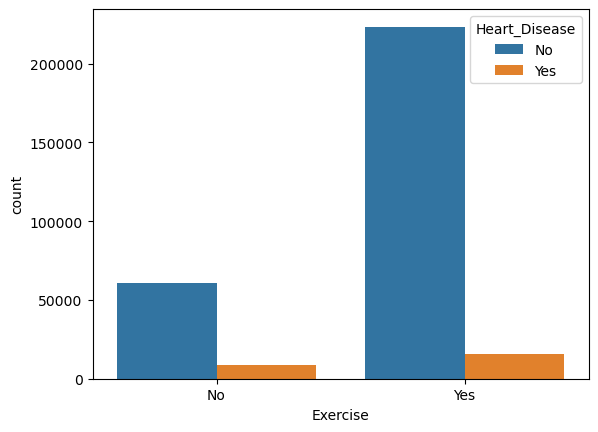

In [37]:
sns.countplot(data=df,hue='Heart_Disease',x='Exercise')
plt.show()

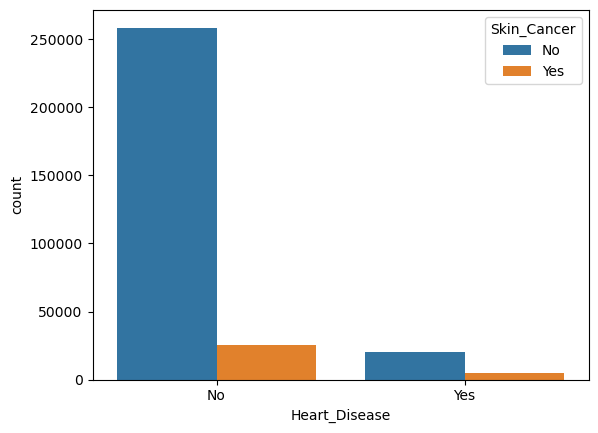

In [38]:
sns.countplot(data=df,x='Heart_Disease',hue='Skin_Cancer')
plt.show()

- Around 25,000 people not having cancer don't have heart disease.

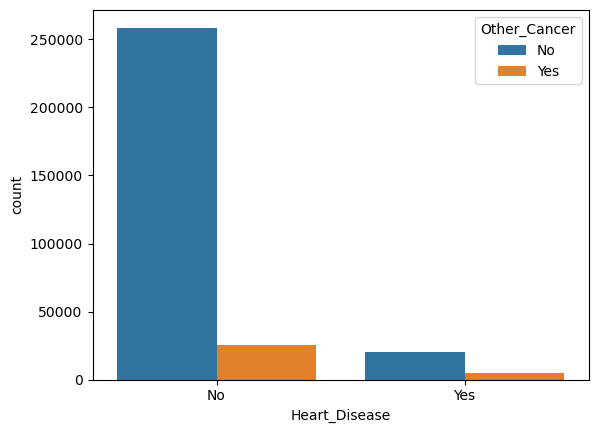

In [39]:
sns.countplot(data=df,x='Heart_Disease',hue='Other_Cancer')
plt.show()

- Around 25,000 people not having cancer don't have heart disease.

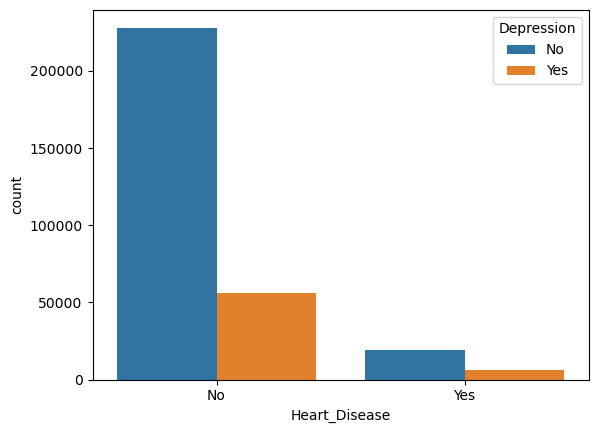

In [40]:
sns.countplot(data=df,x='Heart_Disease',hue='Depression')
plt.show()

- More than 20,000 people not having depression don't have heart disease.

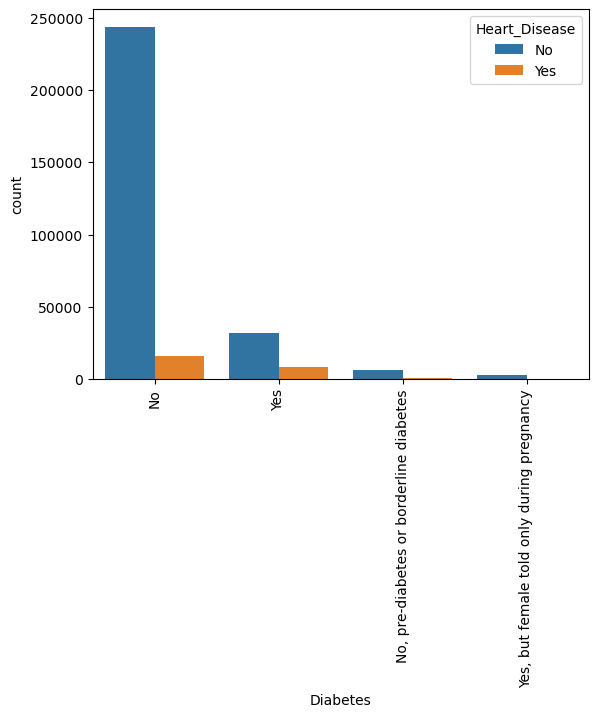

In [41]:
sns.countplot(data=df,hue='Heart_Disease',x='Diabetes')
plt.xticks(rotation=90)
plt.show()

- 25,000 people who don't have diabetes, don't have heart diseases.
- Very less people with diabetes, pre-border diabetes have heart diseases

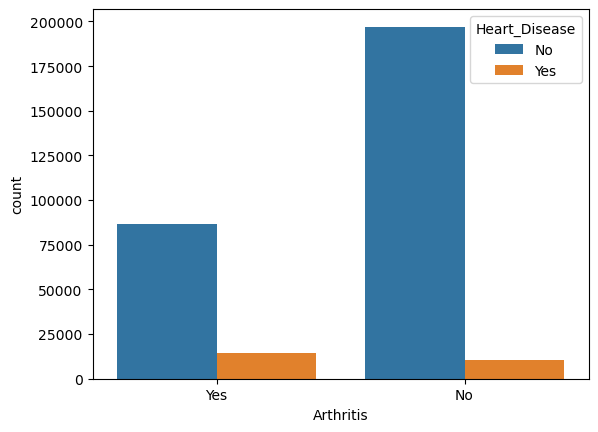

In [42]:
sns.countplot(data=df,hue='Heart_Disease',x='Arthritis')
plt.show()

- Maximum people who do not have arthritis do not have heart disease

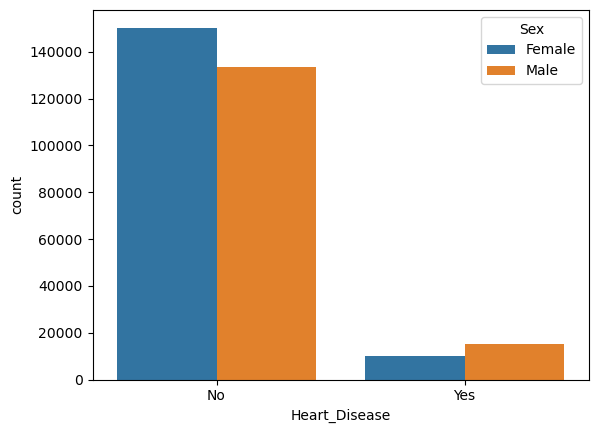

In [43]:
sns.countplot(data=df,x='Heart_Disease',hue='Sex')
plt.show()

- Around 14000 females have no heart disease.
- number of females not having heart disease is greater than number of males without heart disease
- number of males having heart disease is greater than females having heart disease

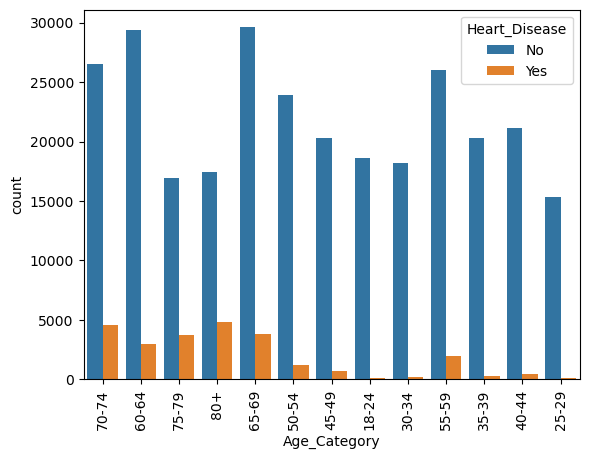

In [44]:
sns.countplot(data=df,hue='Heart_Disease',x='Age_Category')
plt.xticks(rotation=90)
plt.show()

- Maximum people who don't have heart disease lie in the age group of 60-69.
- Maximum peple who have heart disease fall in the age category of 80+.
- almost 0 people have heart disease fall in the age of 18-29 


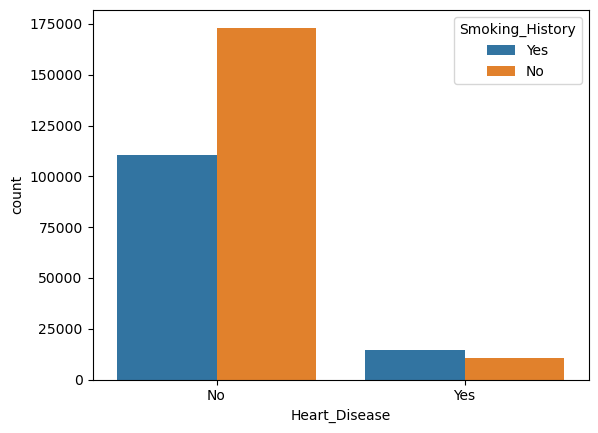

In [45]:
sns.countplot(data=df,x='Heart_Disease',hue='Smoking_History')
plt.show()

- Significant variable since majority of people with no smoking history have no heart disease.

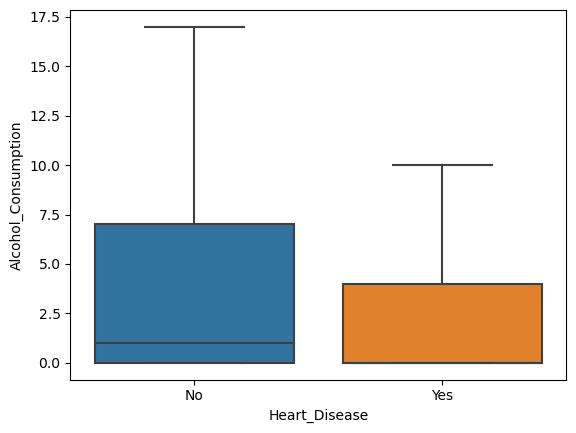

In [46]:
sns.boxplot(data=df,x='Heart_Disease',y='Alcohol_Consumption',showfliers=False)
plt.show()

- SIGNIFICANT VARIABLE SINCE IQR for people with heart disease is less than people without heart disease.

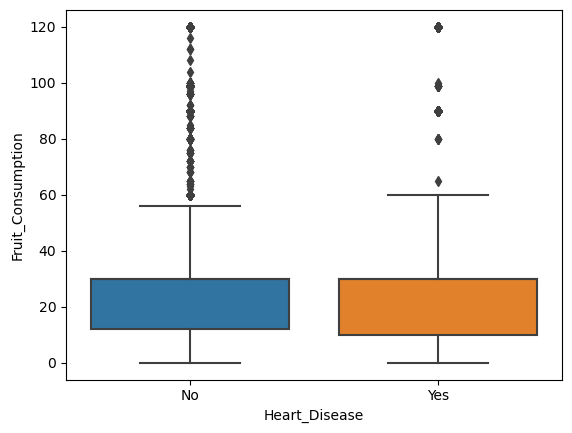

In [47]:
sns.boxplot(data=df,x='Heart_Disease',y='Fruit_Consumption')
plt.show()

- NOT A VERY SIGNIFICANT VARIABLE

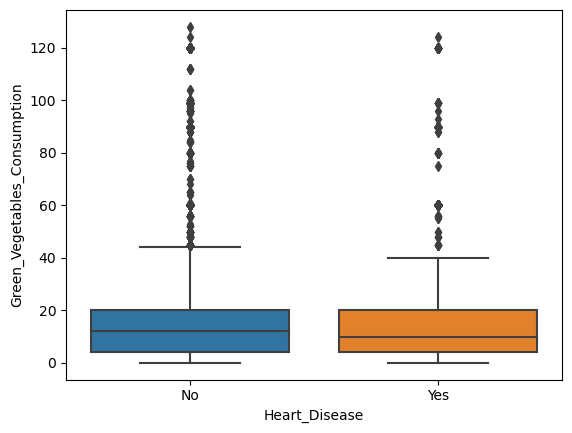

In [48]:
sns.boxplot(data=df,x='Heart_Disease',y='Green_Vegetables_Consumption')
plt.show()

- Left skewed for people having heart disease
- Maximum greenvegetableconsumption for people not having heart disease(130) is higher than people having heart disease(120).
- median greenvegetableconsumption for people having heart disease(10) is lower than people not having heart disease
- NOT A VERY SIGNIFICANT VARIABLE

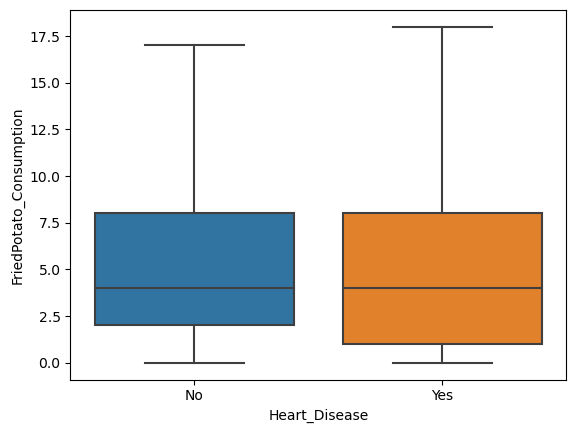

In [49]:
sns.boxplot(data=df,x='Heart_Disease',y='FriedPotato_Consumption',showfliers=False)
plt.show()

- IQR for people having heart disease is greater than people not having heart disease.
- Left skewed for people not having heart disease
- Maximum friedpotatoconsumption for people not having heart disease(130) is higher than people having heart disease(120).
- median friedpotatoconsumption for people having heart disease(10) is greater than people not having heart disease.
- NOT VERY SIGNIFICANT VARIABLE

In [50]:
df.columns

Index(['General_Health', 'Checkup', 'Exercise', 'Heart_Disease', 'Skin_Cancer',
       'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis', 'Sex',
       'Age_Category', 'Height_(cm)', 'Weight_(kg)', 'BMI', 'Smoking_History',
       'Alcohol_Consumption', 'Fruit_Consumption',
       'Green_Vegetables_Consumption', 'FriedPotato_Consumption'],
      dtype='object')

<Axes: xlabel='Heart_Disease', ylabel='count'>

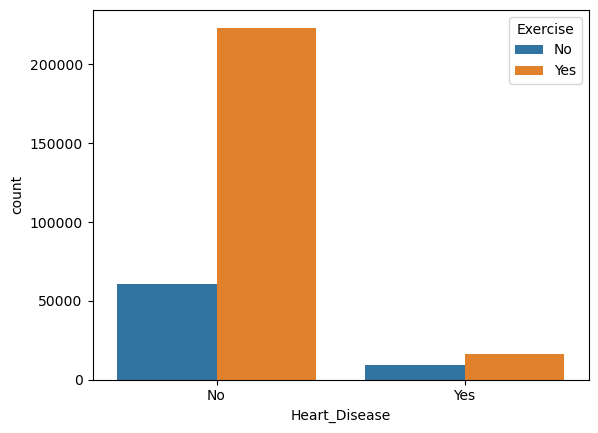

In [51]:
sns.countplot(data=df,x='Heart_Disease',hue='Exercise')

- Majority of people who exercise don't have heart disease. 

In [52]:
len(df.columns)

19

Significant variables: Smoking history,Alcohol Consumption,Exercise,Checkup